In [1]:
from utils import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
stats = {}

#  1. Une stratégie d'évolution inutile

## Test RandomES sur des petites instances des fonctions de test

### Execution

In [10]:
max_evaluations = 5000  # Les critères d'arrêt 
max_iterations  = 5000

nb_runs         = 30    # le nombre d'exécution de chaque algorithme

verbose         = False # True = affichage par iteration (plus lent)

problems_name = [
    'sphere',
    'rosenbrock',
    'sharpridge',
    'tablet'
]

#
# choix des algorithme et des paramètre 
############################################################################

algo_list = [    # Liste des algorithmes lancés (le nom des classes)
    RandomES
]

algo_options_lambda = { # Paramètres spécifiques aux algorithmes. Ce dictionnaire 
    
}

extra_stats = [  # Liste des chose à afficher à l'écran
    'sig',
    'max',
    'min',
    'mu',
    'alpha',
    'lambda',
    'pc',
    'pm',
    'type_cdf',
    'S',
    'gamma',
    'T',
    'T0',
    't',
    'type_xover',
    'type_mutation',
    'type_selection_population',
    'k',
    'n',
]                # (il faut surcharger la print_step dans l'agorithme)    
                    # cf. split_stat_line dans seach/misc/misc.py


In [40]:

stats = execute_and_save_stats(
    problem_size='small',
    nb_exec=3,
    max_evaluations=max_evaluations, max_iterations=max_iterations, 
    nb_runs=nb_runs, 
    algo_options_lambda=algo_options_lambda, 
    extra_stats=extra_stats, 
    verbose=verbose,
    algo_list=algo_list,
    problems_name=problems_name
)

ForkProcess-109 is working on sphereForkProcess-112 is working on tabletForkProcess-110 is working on rosenbrockForkProcess-111 is working on sharpridge



Running RandomES on Sphere for 30 runs [max eval 5000 or max iter 5000]
Running RandomES on Tablet for 30 runs [max eval 5000 or max iter 5000]Running RandomES on Rosenbrock for 30 runs [max eval 5000 or max iter 5000]Running RandomES on SharpRidge for 30 runs [max eval 5000 or max iter 5000]




KeyboardInterrupt: 

### Visualisation

In [48]:
stats['RandomES'] = get_stats_from_csv('RandomES', problems_name, problems_size=['small'])
data = stats['RandomES']

In [49]:
data = data[data['sig'] == 1.0]

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


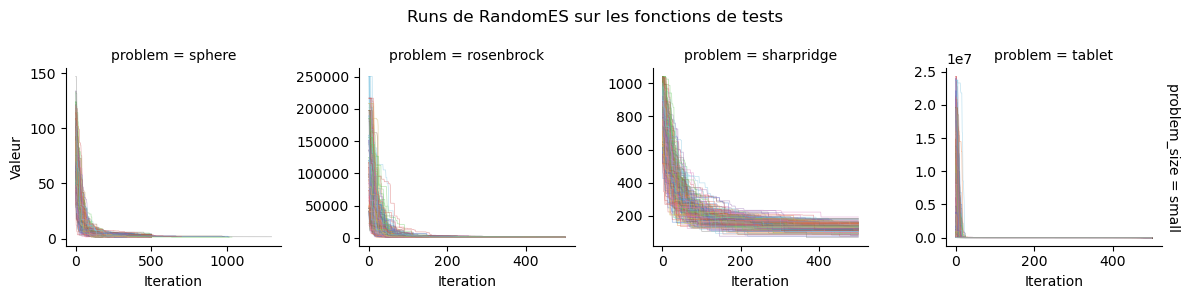

In [51]:
%matplotlib inline
g = sns.FacetGrid(data, col="problem", row="problem_size", margin_titles=True,sharex=False, sharey=False)
g.map(sns.lineplot, "iter", "val", "run", alpha=.5, linewidth=0.5, palette='muted')
g.set_axis_labels("Iteration", "Valeur")
plt.suptitle('Runs de RandomES sur les fonctions de tests')
g.tight_layout()

# 2. Peu Mieux Faire

## Codage BestES

In [3]:
class BestES(RandomES):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def update_m(self, sample):
        index_meilleur = self._idx.index(0)
        meilleur = sample[index_meilleur]

        if self.better(meilleur, self._solution) :
            self._solution = meilleur

## Test BestES

### Execution

In [75]:
max_evaluations = 5000  # Les critères d'arrêt 
max_iterations  = 5000

nb_runs         = 30    # le nombre d'exécution de chaque algorithme

verbose         = False # True = affichage par iteration (plus lent)

problems_name = [
    'sphere',
    'rosenbrock',
    'sharpridge',
    'tablet'
]

#
# choix des algorithme et des paramètre 
############################################################################

algo_list = [    # Liste des algorithmes lancés (le nom des classes)
    BestES
]

algo_options_lambda = { # Paramètres spécifiques aux algorithmes. Ce dictionnaire 
    
}

extra_stats = [  # Liste des chose à afficher à l'écran
    'sig',
    'max',
    'min',
    'mu',
    'alpha',
    'lambda',
    'pc',
    'pm',
    'type_cdf',
    'S',
    'gamma',
    'T',
    'T0',
    't',
    'type_xover',
    'type_mutation',
    'type_selection_population',
    'k',
    'n',
]                # (il faut surcharger la print_step dans l'agorithme)    
                    # cf. split_stat_line dans seach/misc/misc.py

stats = execute_and_save_stats(
    problem_size='small',
    nb_exec=3,
    max_evaluations=max_evaluations, max_iterations=max_iterations, 
    nb_runs=nb_runs, 
    algo_options_lambda=algo_options_lambda, 
    extra_stats=extra_stats, 
    verbose=verbose,
    algo_list=algo_list,
    problems_name=problems_name
)

ForkProcess-361 is working on sphereForkProcess-362 is working on rosenbrockForkProcess-364 is working on tabletForkProcess-363 is working on sharpridge



Running BestES on Rosenbrock for 30 runs [max eval 5000 or max iter 5000]
Running BestES on SharpRidge for 30 runs [max eval 5000 or max iter 5000]Running BestES on Sphere for 30 runs [max eval 5000 or max iter 5000]Running BestES on Tablet for 30 runs [max eval 5000 or max iter 5000]




ForkProcess-374 is working on rosenbrockForkProcess-373 is working on sphereForkProcess-376 is working on tabletForkProcess-375 is working on sharpridge



Running BestES on Tablet for 30 runs [max eval 5000 or max iter 5000]Running BestES on Sphere for 30 runs [max eval 5000 or max iter 5000]Running BestES on Rosenbrock for 30 runs [max eval 5000 or max iter 5000]Running BestES on SharpRidge for 30 runs [max eval 5000 or max iter 5000]



ForkProcess-385 is working on sphereForkProcess-386 is working on rosenbrockForkProcess-387 is working on sharpridgeForkProcess-388 is working on tablet



Running BestES on Sphere for 30 runs [max eval 5000 or max iter 5000]
Running BestES on Rosenbrock for 30 runs [max eval 5000 or max iter 5000]Running BestES on Tablet for 30 runs [max eval 5000 or max iter 5000]
Running BestES on SharpRidge for 30 runs [max eval 5000 or max iter 5000]



### Visualisation

In [53]:
stats['BestES'] = get_stats_from_csv('BestES', problems_name, problems_size=['small'])
data = stats['BestES']

In [54]:
data = data[data['sig'] == 1.0]

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


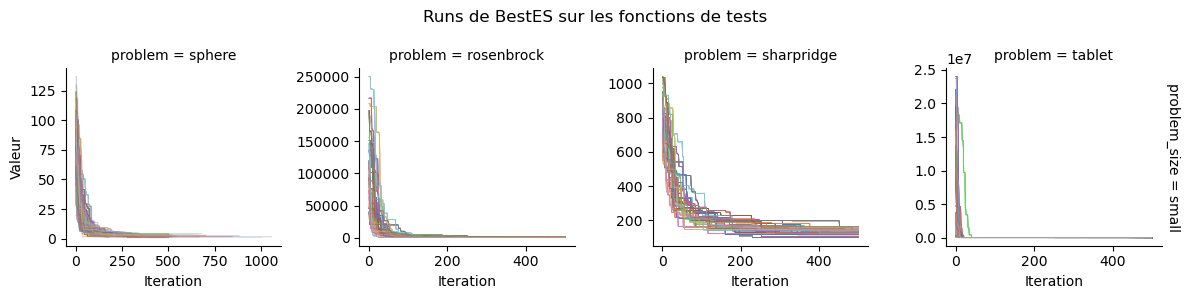

In [55]:
%matplotlib inline
g = sns.FacetGrid(data, col="problem", row="problem_size", margin_titles=True,sharex=False, sharey=False)
g.map(sns.lineplot, "iter", "val", "run", alpha=.5, linewidth=0.5, palette='muted')
g.set_axis_labels("Iteration", "Valeur")
plt.suptitle('Runs de BestES sur les fonctions de tests')
g.tight_layout()

## Comparaison BestES et RandomES

In [56]:
stats['RandomES'] = get_stats_from_csv('RandomES', problems_name, problems_size=['small'])
stats['BestES'] = get_stats_from_csv('BestES', problems_name, problems_size=['small'])

In [57]:
data = pd.concat([stats['RandomES'], stats['BestES']])
data = data[data['sig'] == 1.0]

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


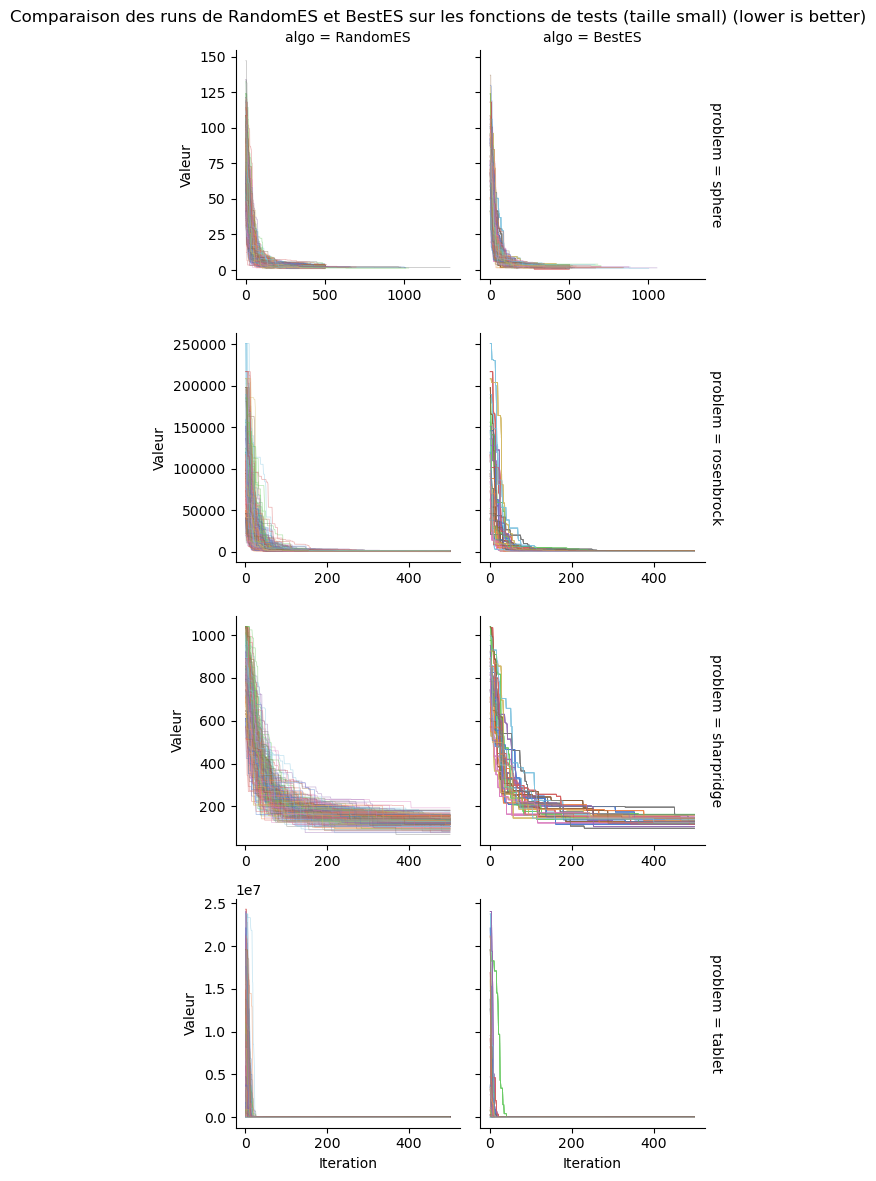

In [58]:
%matplotlib inline
g = sns.FacetGrid(data, row="problem", col="algo", margin_titles=True,sharex='row', sharey='row')
g.map(sns.lineplot, "iter", "val", "run", alpha=.5, linewidth=0.5, palette='muted')
g.set_axis_labels("Iteration", "Valeur")

plt.suptitle('Comparaison des runs de RandomES et BestES sur les fonctions de tests (taille small) (lower is better)')
# add anotation to g lower is better
g.tight_layout()
plt.show()

In [59]:
min_par_run = data.groupby(['problem', 'problem_size', 'algo', 'run']).agg({'val': 'min'}).reset_index()

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


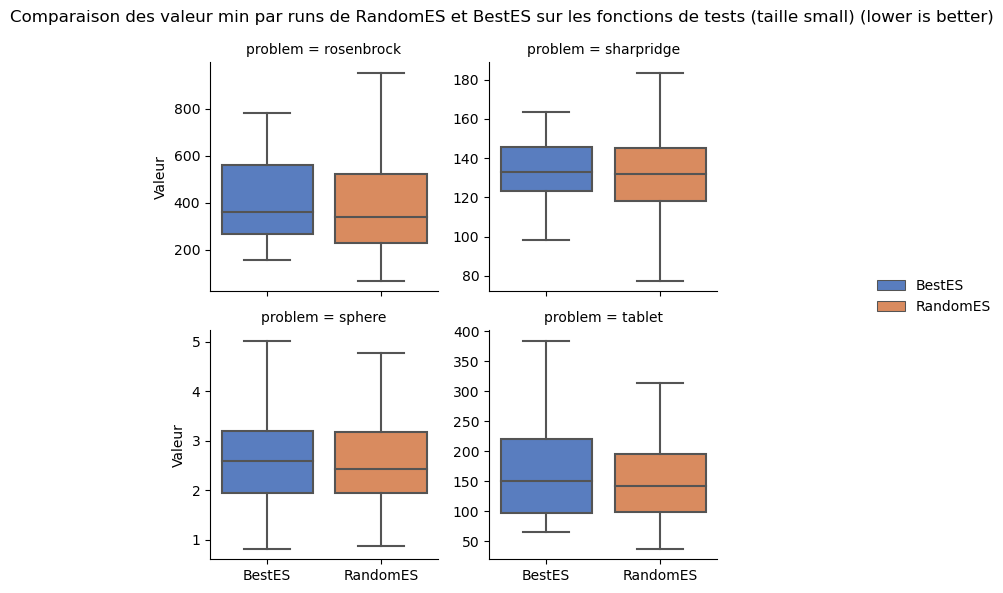

In [60]:
b = sns.FacetGrid(min_par_run, col="problem", margin_titles=True, col_wrap=2, sharey=False)
b.map(sns.boxplot, "algo", "val", "algo", palette='muted', showfliers=False, dodge=False)
b.set_axis_labels("", "Valeur")
b.add_legend()
plt.suptitle('Comparaison des valeur min par runs de RandomES et BestES sur les fonctions de tests (taille small) (lower is better)')
b.tight_layout()
plt.show()

On peut voir que BestES converge plus rapidement que RandomES au niveau des runs (exploitation) mais se retrouve souvent 'coincé' au même optimum local pendant plusieurs itérations, tandis que RandomES à une évolution plus constante et grâce aux boxplots (obtenu en prenant le min de chaque run (overall best)) on peut voir que RandomES a légérement une meilleure performance en moyenne que BestES et en moyenne plus de dispersion (exploration) (les outliers ne sont pas représentés pour plus de clarté).

# MeanES

## Codage MeanES

In [4]:
class MeanES(RandomES):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def update_m(self, sample):
        moyenne = None
        for i in range(len(sample)):
            index = self._idx[i]
            if index < self._mu: # On prend les mu premiers
                if moyenne is None:
                    moyenne = sample[index]
                else:
                    moyenne._sol += sample[index]._sol
        moyenne._sol /= self._mu
        
        if self.better(moyenne, self._solution) :
            self._solution = moyenne

## Test MeanES

In [62]:
max_evaluations = 5000  # Les critères d'arrêt 
max_iterations  = 5000

nb_runs         = 30    # le nombre d'exécution de chaque algorithme

verbose         = False # True = affichage par iteration (plus lent)

problems_name = [
    'sphere',
    'rosenbrock',
    'sharpridge',
    'tablet'
]

#
# choix des algorithme et des paramètre 
############################################################################

algo_list = [    # Liste des algorithmes lancés (le nom des classes)
    MeanES
]

algo_options_lambda = { # Paramètres spécifiques aux algorithmes. Ce dictionnaire 
    
}

extra_stats = [  # Liste des chose à afficher à l'écran
    'sig',
    'max',
    'min',
    'mu',
    'alpha',
    'lambda',
    'pc',
    'pm',
    'type_cdf',
    'S',
    'gamma',
    'T',
    'T0',
    't',
    'type_xover',
    'type_mutation',
    'type_selection_population',
    'k',
    'n',
]                # (il faut surcharger la print_step dans l'agorithme)    
                    # cf. split_stat_line dans seach/misc/misc.py


In [ ]:

stats = execute_and_save_stats(
    problem_size='small',
    nb_exec=3,
    max_evaluations=max_evaluations, max_iterations=max_iterations, 
    nb_runs=nb_runs, 
    algo_options_lambda=algo_options_lambda, 
    extra_stats=extra_stats, 
    verbose=verbose,
    algo_list=algo_list,
    problems_name=problems_name
)

## Comparaison MeanES et RandomES

In [9]:
stats['RandomES'] = get_stats_from_csv('RandomES', problems_name, problems_size=['small'])
stats['BestES'] = get_stats_from_csv('BestES', problems_name, problems_size=['small'])
stats['MeanES'] = get_stats_from_csv('MeanES', problems_name, problems_size=['small'])

NameError: name 'problems_name' is not defined

In [64]:
data = pd.concat([stats['RandomES'], stats['BestES'], stats['MeanES']])
data = data[data['sig'] == 1.0]

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


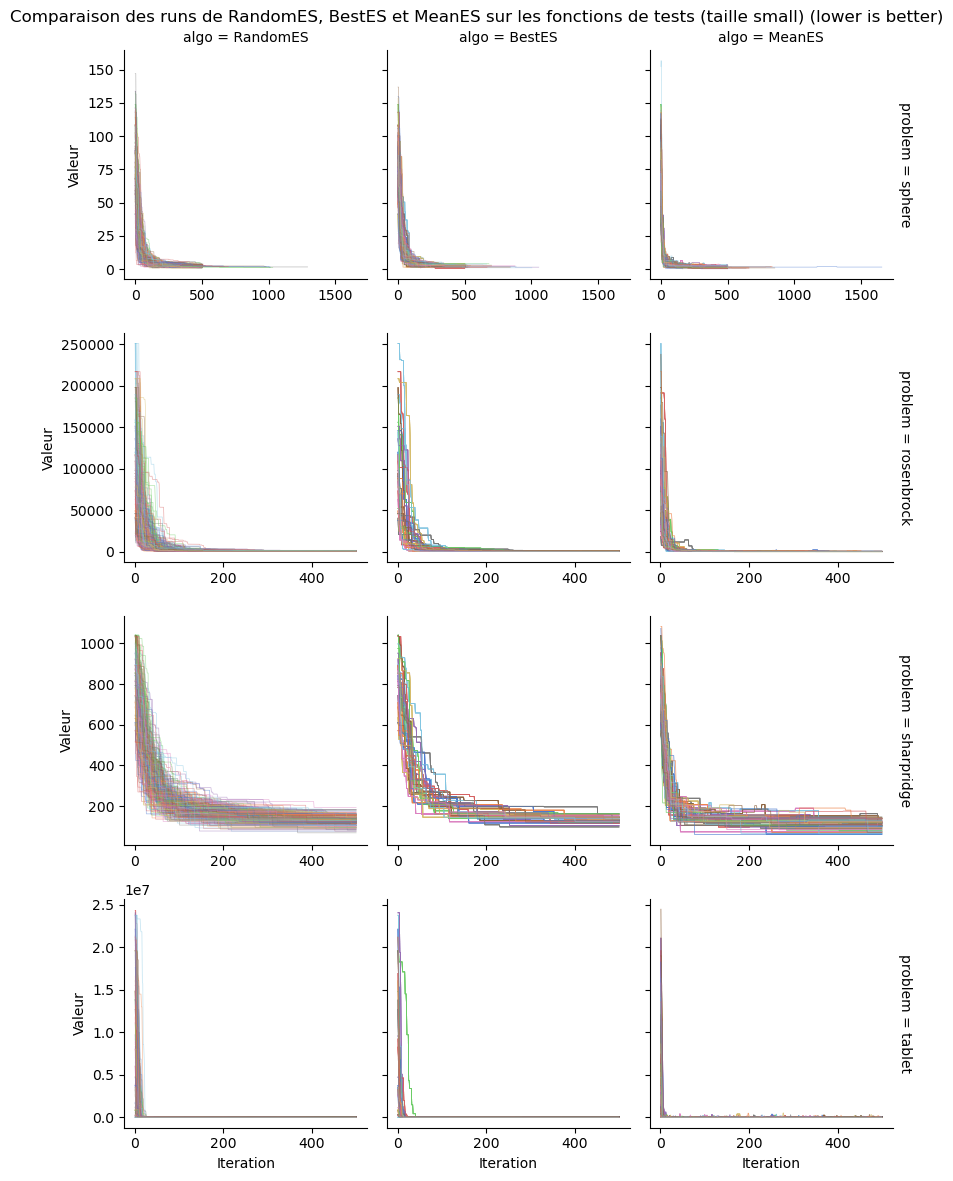

In [65]:
%matplotlib inline
g = sns.FacetGrid(data, row="problem", col="algo", margin_titles=True,sharex='row', sharey='row')
g.map(sns.lineplot, "iter", "val", "run", alpha=.5, linewidth=0.5, palette='muted')
g.set_axis_labels("Iteration", "Valeur")
plt.suptitle('Comparaison des runs de RandomES, BestES et MeanES sur les fonctions de tests (taille small) (lower is better)')
# add anotation to g lower is better
g.tight_layout()
plt.show()

In [67]:
min_par_run = data.groupby(['problem', 'problem_size', 'algo', 'run']).agg({'val': 'min'}).reset_index()

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


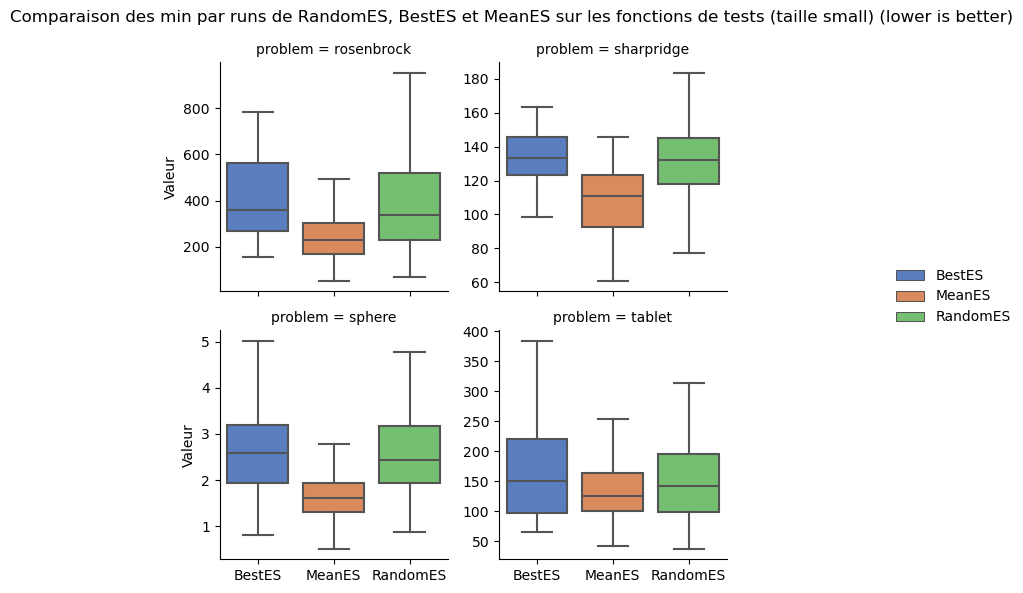

In [68]:
b = sns.FacetGrid(min_par_run, col="problem", margin_titles=True, col_wrap=2, sharey=False)
b.map(sns.boxplot, "algo", "val", "algo", palette='muted', showfliers=False, dodge=False)
b.set_axis_labels("", "Valeur")
b.add_legend()
plt.suptitle('Comparaison des min par runs de RandomES, BestES et MeanES sur les fonctions de tests (taille small) (lower is better)')
b.tight_layout()
plt.show()

Au niveau des runs, on peut constater que MeanES converge plus rapidement que RandomES et BestES, son evolution est plus constante, tout au long des itérations, avec des temps en temps des sauts (exploration) vers des individus moins performants.
Au niveau des boxplots, on peut voir que MeanES a une meilleure performance que RandomES et BestES et en moyenne moins de dispersion (les outliers ne sont pas représentés pour plus de clarté).

## Conclusion pourquoi MeanES est meilleur que BestES
Mon hypothèse est que MeanES est meilleur que BestES car MeanES fait une exploration plus constante et plus efficace que BestES, qui lui se retrouve souvent 'coincé' au même optimum local pendant plusieurs itérations. En prenant la moyenne des individus, MeanES peut esperer sortir de cet optimum local en modifiant sa trajectoire, tandis que BestES ne peut pas.

# 3. Avancer par petit pas

## Test sur fontion sphère

In [69]:
max_evaluations = 5000  # Les critères d'arrêt 
max_iterations  = 5000

nb_runs         = 30    # le nombre d'exécution de chaque algorithme

verbose         = False # True = affichage par iteration (plus lent)

problems_name = [
    'sphere',
    # 'rosenbrock',
    # 'sharpridge',
    # 'tablet'
]

#
# choix des algorithme et des paramètre 
############################################################################

algo_list = [    # Liste des algorithmes lancés (le nom des classes)
    RandomES,
    BestES,
    MeanES
]
sig_values = [0.1, 0.2, 0.5, 1, 2, 5, 10]
algo_options_lambda = { # Paramètres spécifiques aux algorithmes. Ce dictionnaire 
    'sigma': lambda : sig_values.pop(0) if len(sig_values) > 0 else 0.5
}

extra_stats = [  # Liste des chose à afficher à l'écran
    'sig',
    'max',
    'min',
    'mu',
    'alpha',
    'lambda',
    'pc',
    'pm',
    'type_cdf',
    'S',
    'gamma',
    'T',
    'T0',
    't',
    'type_xover',
    'type_mutation',
    'type_selection_population',
    'k',
    'n',
]                # (il faut surcharger la print_step dans l'agorithme)    
                    # cf. split_stat_line dans seach/misc/misc.py


In [23]:

stats = execute_and_save_stats(
    problem_size='small',
    nb_exec=3,
    max_evaluations=max_evaluations, max_iterations=max_iterations, 
    nb_runs=nb_runs, 
    algo_options_lambda=algo_options_lambda, 
    extra_stats=extra_stats, 
    verbose=verbose,
    algo_list=algo_list,
    problems_name=problems_name
)

ForkProcess-73 is working on sphere
Running RandomES on Sphere for 30 runs [max eval 5000 or max iter 5000]Running BestES on Sphere for 30 runs [max eval 5000 or max iter 5000]Running MeanES on Sphere for 30 runs [max eval 5000 or max iter 5000]


ForkProcess-85 is working on sphere
Running RandomES on Sphere for 30 runs [max eval 5000 or max iter 5000]Running BestES on Sphere for 30 runs [max eval 5000 or max iter 5000]Running MeanES on Sphere for 30 runs [max eval 5000 or max iter 5000]


ForkProcess-97 is working on sphere
Running RandomES on Sphere for 30 runs [max eval 5000 or max iter 5000]Running BestES on Sphere for 30 runs [max eval 5000 or max iter 5000]

Running MeanES on Sphere for 30 runs [max eval 5000 or max iter 5000]


## Influence de sigma sur les résultats

In [11]:
stats['RandomES'] = get_stats_from_csv('RandomES', ['sphere'], problems_size=['small'])
stats['BestES'] = get_stats_from_csv('BestES', ['sphere'], problems_size=['small'])
stats['MeanES'] = get_stats_from_csv('MeanES', ['sphere'], problems_size=['small'])

In [77]:
data = pd.concat([stats['RandomES'], stats['BestES'], stats['MeanES']])

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


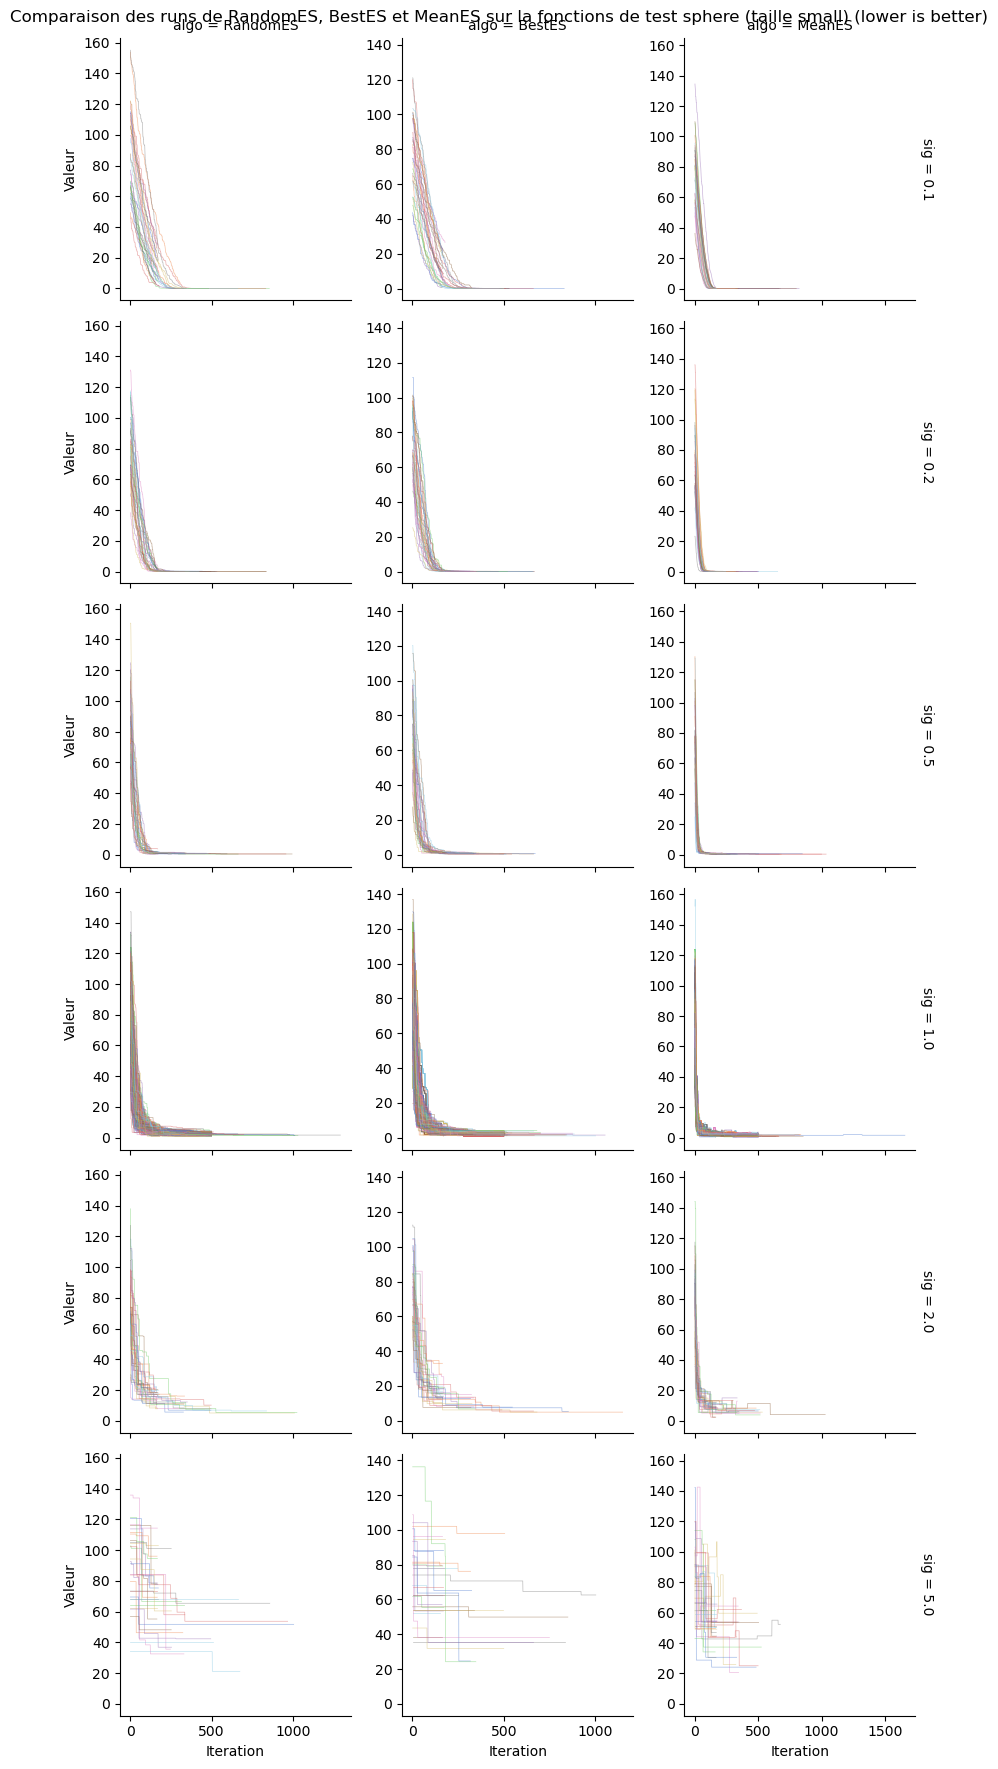

In [78]:
%matplotlib inline
g = sns.FacetGrid(data, row="sig", col="algo", margin_titles=True,sharex='col', sharey='col')
g.map(sns.lineplot, "iter", "val", "run", alpha=.5, linewidth=0.5, palette='muted')
g.set_axis_labels("Iteration", "Valeur")
plt.suptitle('Comparaison des runs de RandomES, BestES et MeanES sur la fonctions de test sphere (taille small) (lower is better)')
# add anotation to g lower is better
g.tight_layout()
plt.show()

On peut voir que plus sigma est petit, plus il y a une évolution assez constante et rapide. Et au contraire, plus sigma est grand plus on est souvent 'coincé' au même optimum local pendant plusieurs itérations d'ou les escaliers sur les graphiques.
. Cependant, si sigma est trop petit, ici 0.1, l'évolution est plus lente. 

In [87]:
min_par_run = data.groupby(['problem', 'problem_size', 'algo', 'run', 'sig']).agg({'val': 'min'}).reset_index()

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


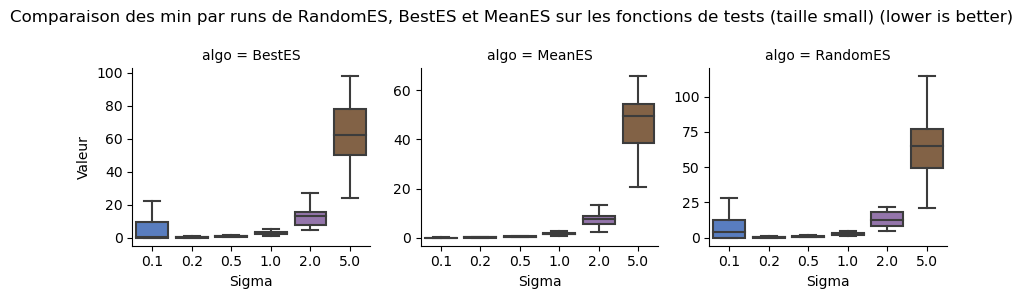

In [88]:
b = sns.FacetGrid(min_par_run, col="algo", margin_titles=True, sharey=False)
b.map(sns.boxplot, "sig", "val", "sig", palette='muted', showfliers=False, dodge=False)
b.set_axis_labels("Sigma", "Valeur")
# b.add_legend()
plt.suptitle('Comparaison des min par runs de RandomES, BestES et MeanES sur la fonction de test sphere (taille small) (lower is better)')
b.tight_layout()
plt.show()

## Meilleur valeur
On peut voir ici que sigma = 0.2 est la meilleure valeur pour cette fonction de test.

# 4. Courir ou rallentir

## Mise à jour update_sigma

In [5]:
def f (self, sample):
    pt = 1/5
    ps = 0
    for x in sample: # On compte le nombre de solution meilleure que la solution courante
        if self.better(x, self._solution):
            ps += 1
    ps /= self._lambda
    self._sigma = self._sigma * np.exp((1/3) * (ps - pt)/(1-pt))

### RandomES

In [6]:
RandomES.update_sigma = f

### BestES

In [7]:
BestES.update_sigma = f

### MeanES

In [8]:
MeanES.update_sigma = f

## Retest des algorithmes

In [90]:
max_evaluations = 5000  # Les critères d'arrêt 
max_iterations  = 5000

nb_runs         = 30    # le nombre d'exécution de chaque algorithme

verbose         = False # True = affichage par iteration (plus lent)

problems_name = [
    'sphere',
    # 'rosenbrock',
    # 'sharpridge',
    # 'tablet'
]

#
# choix des algorithme et des paramètre 
############################################################################

algo_list = [    # Liste des algorithmes lancés (le nom des classes)
    RandomES,
    BestES,
    MeanES
]
sig_values = []
algo_options_lambda = { # Paramètres spécifiques aux algorithmes. Ce dictionnaire 
    'sigma': lambda : sig_values.pop(0) if len(sig_values) > 0 else 1.
}

extra_stats = [  # Liste des chose à afficher à l'écran
    'sig',
    'max',
    'min',
    'mu',
    'alpha',
    'lambda',
    'pc',
    'pm',
    'type_cdf',
    'S',
    'gamma',
    'T',
    'T0',
    't',
    'type_xover',
    'type_mutation',
    'type_selection_population',
    'k',
    'n',
]                # (il faut surcharger la print_step dans l'agorithme)    
                    # cf. split_stat_line dans seach/misc/misc.py


In [91]:

stats = execute_and_save_stats(
    problem_size='small',
    nb_exec=3,
    max_evaluations=max_evaluations, max_iterations=max_iterations, 
    nb_runs=nb_runs, 
    algo_options_lambda=algo_options_lambda, 
    extra_stats=extra_stats, 
    verbose=verbose,
    algo_list=algo_list,
    problems_name=problems_name
)

ForkProcess-1 is working on sphere


Running RandomES on Sphere for 30 runs [max eval 5000 or max iter 5000]Running BestES on Sphere for 30 runs [max eval 5000 or max iter 5000]Running MeanES on Sphere for 30 runs [max eval 5000 or max iter 5000]


ForkProcess-13 is working on sphere
Running RandomES on Sphere for 30 runs [max eval 5000 or max iter 5000]Running BestES on Sphere for 30 runs [max eval 5000 or max iter 5000]

Running MeanES on Sphere for 30 runs [max eval 5000 or max iter 5000]
ForkProcess-25 is working on sphere
Running RandomES on Sphere for 30 runs [max eval 5000 or max iter 5000]Running BestES on Sphere for 30 runs [max eval 5000 or max iter 5000]

Running MeanES on Sphere for 30 runs [max eval 5000 or max iter 5000]


## Décrire evolution de sigma

In [77]:
stats['RandomES'] = get_stats_from_csv('RandomES', ['sphere'], problems_size=['small'])
stats['BestES'] = get_stats_from_csv('BestES', ['sphere'], problems_size=['small'])
stats['MeanES'] = get_stats_from_csv('MeanES', ['sphere'], problems_size=['small'])

In [110]:
n = 30
stats2 = {}
for nom, d in stats.items():
    m = d['run'].max()
    filtered_data = d[(d['run'] >= (m - n)) & (d['run'] <= m)]
    stats2[nom] = filtered_data

In [111]:
data = pd.concat([stats2['RandomES'], stats2['BestES'], stats2['MeanES']])

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


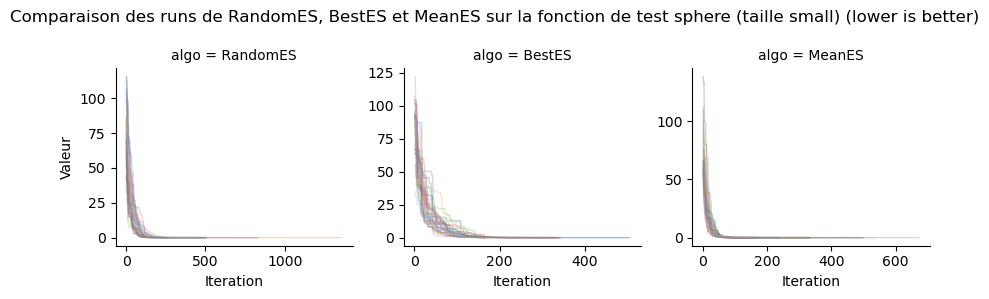

In [117]:
%matplotlib inline
g = sns.FacetGrid(data, col="algo", margin_titles=True,sharex='col', sharey='col')
g.map(sns.lineplot, "iter", "val", "run", alpha=.3, linewidth=1., palette='muted')
g.set_axis_labels("Iteration", "Valeur")
plt.suptitle('Comparaison des runs de RandomES, BestES et MeanES sur la fonction de test sphere (taille small) (lower is better)')
# add anotation to g lower is better
g.tight_layout()
plt.show()

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


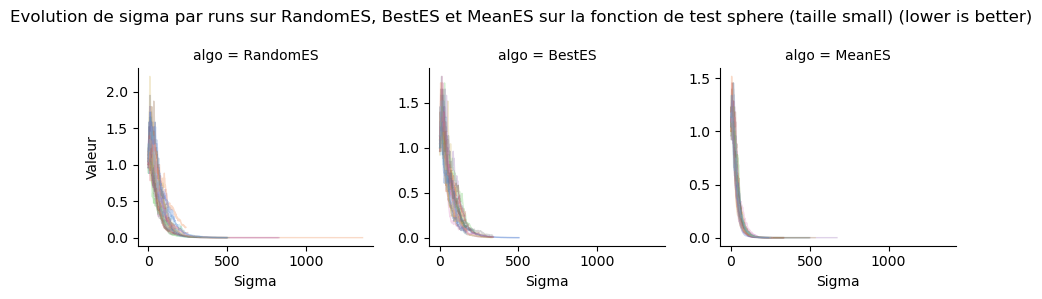

In [119]:
b = sns.FacetGrid(data, col="algo", margin_titles=True, sharey=False)
b.map(sns.lineplot, "iter", "sig", "run", alpha=.3, linewidth=1., palette='muted')
b.set_axis_labels("Sigma", "Valeur")
# b.add_legend()
plt.suptitle('Evolution de sigma par runs sur RandomES, BestES et MeanES sur la fonction de test sphere (taille small) (lower is better)')
b.tight_layout()
plt.show()

# 5. Prendre en compte son chemin

## MuCommaLambdaES

In [ ]:
class MuComaLambdaES(RandomES):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def update_m(self, sample):
        moyenne = None
        for i in range(len(sample)):
            index = self._idx[i]
            if index < self._mu: # On prend les mu premiers
                if moyenne is None:
                    moyenne = sample[index]
                else:
                    moyenne._sol += sample[index]._sol
        moyenne._sol /= self._mu
        
        if self.better(moyenne, self._solution) :
            self._solution = moyenne

## Test MuCommaLambdaES

## Comparaison MuCommaLambdaES avec les autres algorithmes sur des grands problèmes (augmenter le budget si besoin)